# Data Collection

# Importing Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('StudentsPerformance (1).csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.head()#Show top 5 records

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()#Show bottom 5 records

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Data Checks to Perform

# Check Missing Values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Check Duplicates

In [8]:
df.duplicated().sum()

0

# Check the null and Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Check the Number of Unique Values in Each Column

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Check Statistics of the Data Set

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


# Exploring Data Visualization


# Analysing Gender

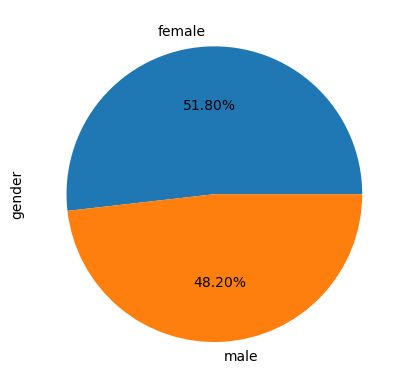

In [13]:
#Is gender has any impact on student’s performance?
gender_percent=df['gender'].value_counts(normalize=True)*100
gender_percent.plot(kind='pie',autopct='%.2f%%')
plt.show()


Gender has balanced data with male students are 48% and female
students are 52%

# Analysing Test Preparation Course

In [17]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

([<matplotlib.patches.Wedge at 0x1b15981b2b0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

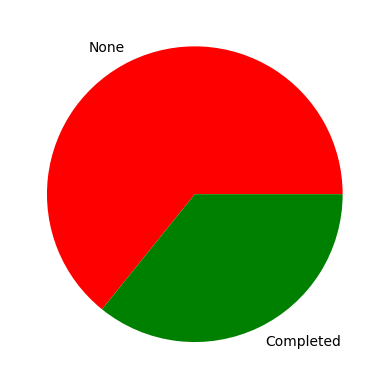

In [18]:
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

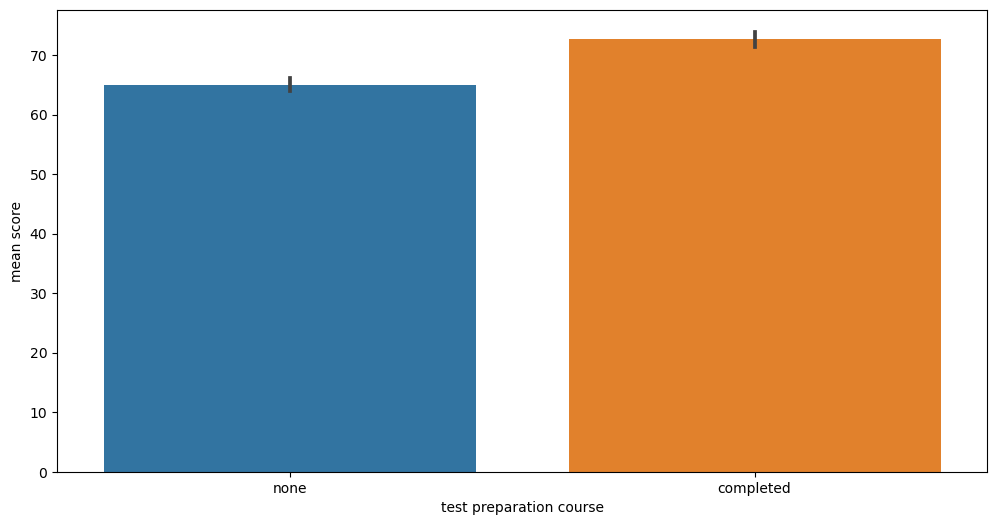

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'test preparation course', y = 'mean score', data = df)
plt.show()

The students who have completed Preparation Course are scoring good scores

# Analysing Lunch

<Axes: xlabel='lunch', ylabel='mean score'>

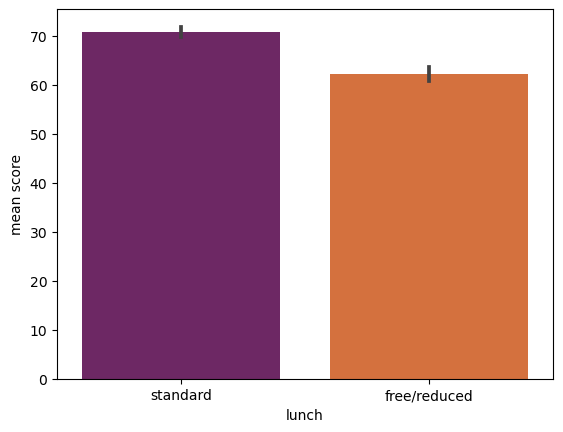

In [20]:
sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')

The students who get standard lunch are performing better in exams than the students with free/reduced lunch

# Analysing Race/Ethnicity Column

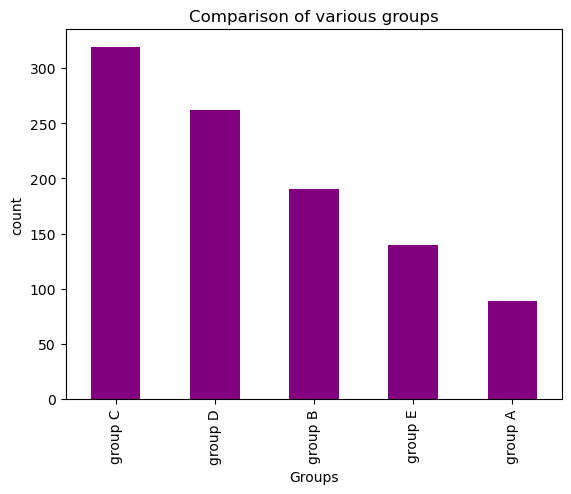

In [24]:
df['race/ethnicity'].value_counts(normalize = True)
df['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'purple')
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()


Most of the student belonging from group C /group D.
Lowest number of students belong to group A.

# Analysing Parental Level of Education

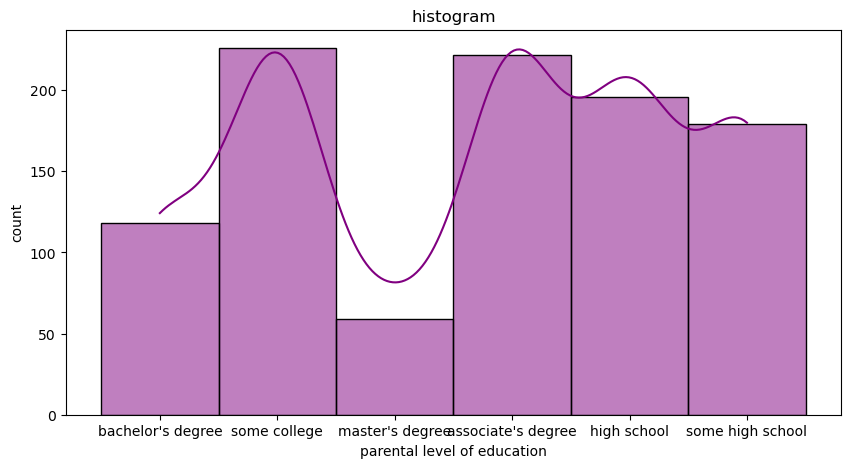

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df['parental level of education'],kde=True,color='purple')
plt.title('histogram')
plt.xlabel('parental level of education')
plt.ylabel('count')
plt.show()

Largest number of parents are from college.

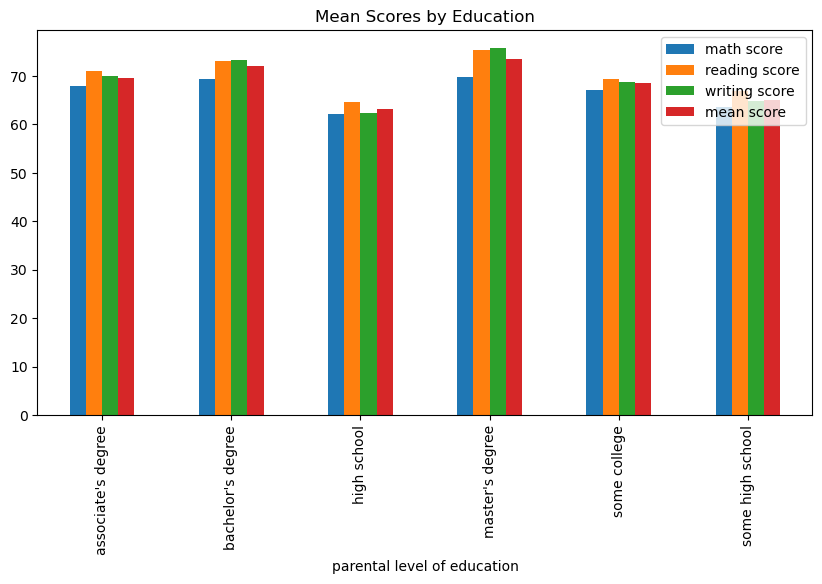

In [26]:
df.groupby('parental level of education').mean().plot(kind='bar',figsize=(10,5))

plt.title('Mean Scores by Education')

plt.show()

The score of student whose parents possess master and bachelor level 
education are higher than others therefore Parents Education is directly proportional to Students Marks

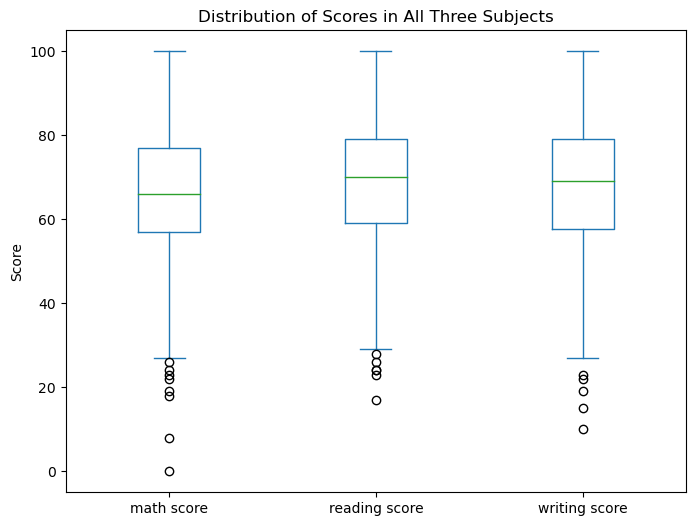

In [27]:
df[['math score', 'reading score', 'writing score']].plot(kind='box', figsize=(8, 6))

# Adding title and labels
plt.title('Distribution of Scores in All Three Subjects')
plt.ylabel('Score')

# Show plot
plt.show()

From the above three plots its clearly visible that most of the 
students score in between 60-80 in Maths whereas in reading and 
writing most of them score from 50-80.

# Label Encoding


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean score                   1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [29]:
df.gender=df.gender.replace('male',0).replace('female',1)

In [30]:
df.gender.unique()

array([1, 0], dtype=int64)

In [31]:
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)


In [32]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [33]:
df['parental level of education'].replace({"bachelor's degree":0,'some college':1,"master's degree":2,"associate's degree":3,'high school':4,'some high school':5},inplace=True)

In [34]:
df['lunch'].unique()



array(['standard', 'free/reduced'], dtype=object)

In [35]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [36]:
df['lunch'].replace({'standard':0,'free/reduced':1},inplace=True)

In [37]:
df['test preparation course'].replace({'none':0,'completed':1},inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean score                   1000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


# visualize the correlation between different numerical variables in the dataset

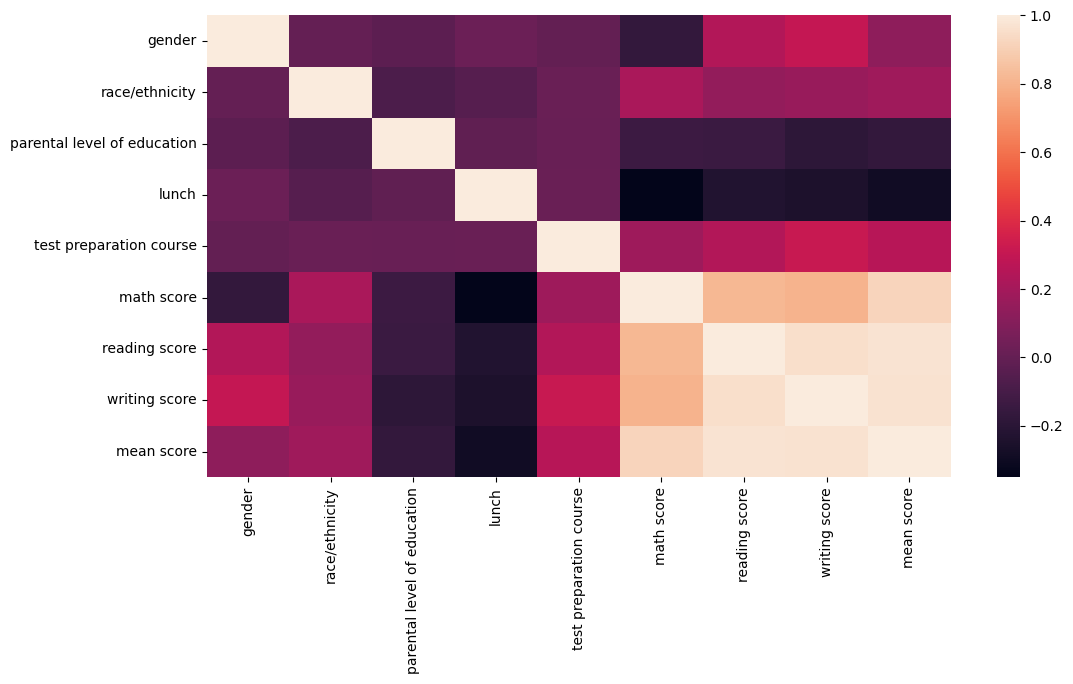

In [39]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

# Model Training


# Data Preprocessing

In [40]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,1,2,0,0,0,73.0
1,1,3,1,0,1,82.0
2,1,2,2,0,0,93.0
3,0,1,3,1,0,49.0
4,0,3,1,0,0,76.0


In [41]:
from sklearn.model_selection import train_test_split
x = df.drop(['mean score'], axis  = 1)
y = df['mean score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building

In [46]:
#This is a class from the sklearn.linear_model module that is used to perform linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


#Creating a Linear Regression Model Instance
lr=LinearRegression()

#Training the Linear Regression Model
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#calculate and evaluate the model's prediction accuracy

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")



Mean Absolute Error (MAE): 10.59


In [38]:
#Difference Between Actual and Predicted Values

In [39]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.0,69.698745,17.301255
737,64.0,69.353359,-5.353359
740,75.0,70.950272,4.049728
660,75.0,58.854724,16.145276
411,82.0,79.733861,2.266139
...,...,...,...
408,55.0,69.381238,-14.381238
332,57.0,77.349451,-20.349451
208,77.0,61.179812,15.820188
613,72.0,69.698745,2.301255


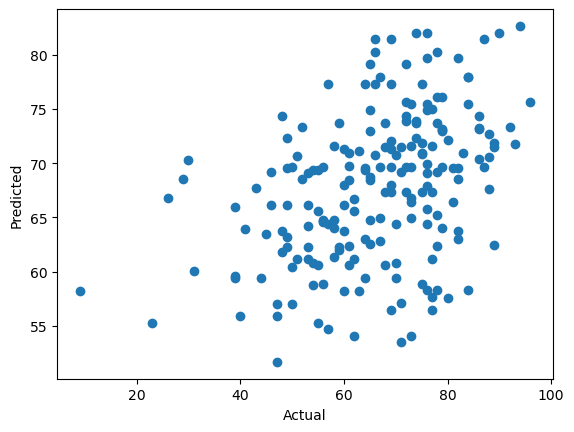

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

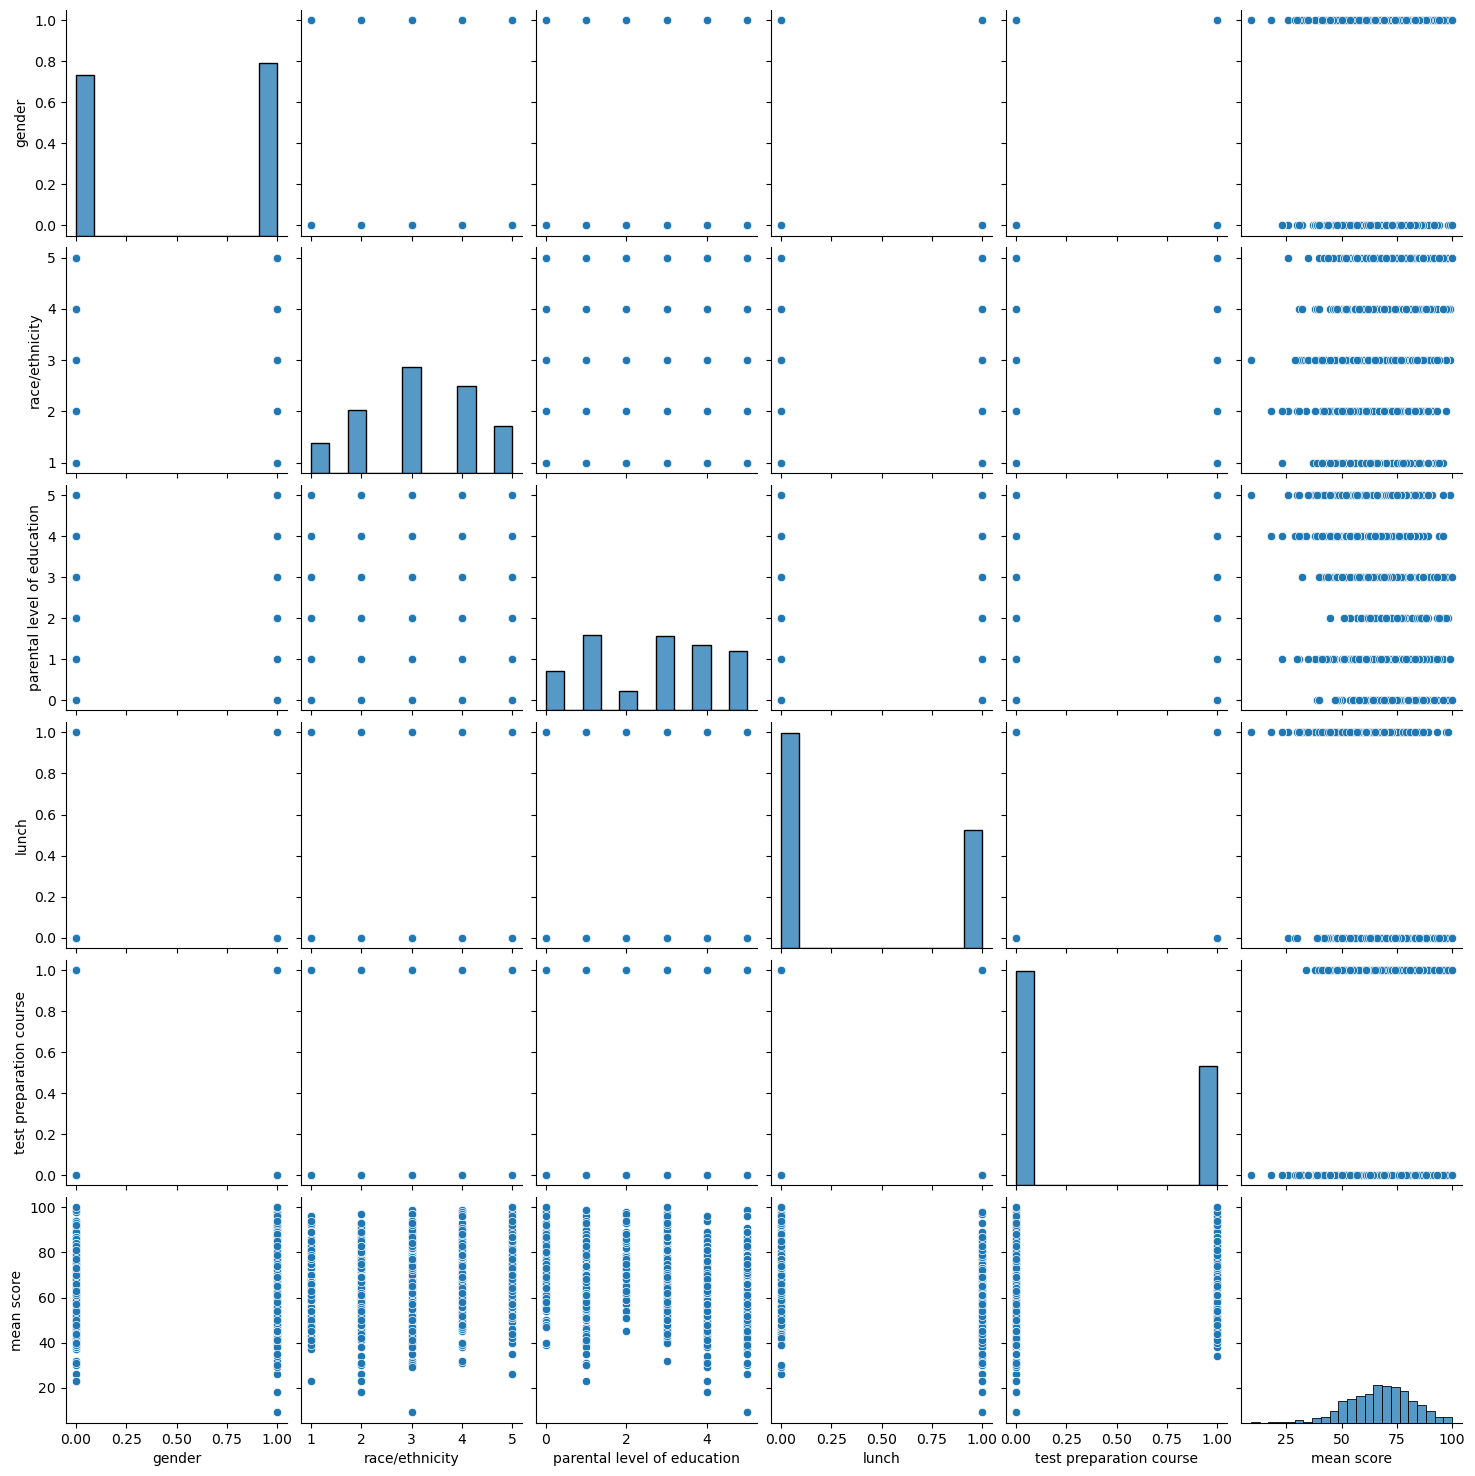

In [45]:
sns.pairplot(df)
plt.show()